In [2]:
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [4]:
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))


In [5]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [6]:
#Print out how many the different cities were generated

print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 758 different cities using random numbers.


In [7]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

In [8]:
#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

In [9]:
#api key used with openweathermap api

api_key = "5ba2fb34a0f148d20a59b2aa65a5dada"


In [10]:
#loop through all rows and fill in values for blank columns in dataframe

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=arraial do cabo,br&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada


/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launch

http://api.openweathermap.org/data/2.5/forecast?q=zhigansk,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=vila,vu&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip


/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/davidskamins/anaconda3/envs/saintlaurent/lib/python3.6/site-packages/ipykernel_launch

http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=sao filipe,cv&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=alice,us&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=dicabisagan,ph&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=kazalinsk,kz&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=roald,no&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=ambikapur,in&units=IMPERIAL&mode=j

http://api.openweathermap.org/data/2.5/forecast?q=bogovarovo,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=bambous virieux,mu&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=kobayashi,jp&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=ossora,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=yellowknife,ca&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=abbeville,us&units=IMPERIAL&mode=json&APPID=5ba2fb34a

http://api.openweathermap.org/data/2.5/forecast?q=souillac,mu&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=hobyo,so&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=amambai,br&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=gonbad-e qabus,ir&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=viedma,ar&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=naze,jp&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=grindavik,is&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=axim,gh&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada

http://api.openweathermap.org/data/2.5/forecast?q=ponta delgada,pt&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=iskateley,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=paita,pe&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=touros,br&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=port hardy,ca&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=barbar,sd&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=faya,td&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=k

http://api.openweathermap.org/data/2.5/forecast?q=petropavlovsk-kamchatskiy,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=milkovo,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=butembo,cd&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=tabuk,sa&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=northam,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=nome,us&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPE

http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=luang prabang,la&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=samarai,pg&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=huejuquilla el alto,mx&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=codrington,ag&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=lata,sb&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=hasaki,jp&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada

http://api.openweathermap.org/data/2.5/forecast?q=ichinoseki,jp&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=lake charles,us&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=matara,lk&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=belmonte,br&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=avera,pf&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=rabaul,pg&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=christchurch,nz&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=churapcha,ru&units=IMPERIAL&mo

http://api.openweathermap.org/data/2.5/forecast?q=mersing,my&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=dalby,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=ulladulla,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=coruripe,br&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=wolmaranstad,za&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=longlac,ca&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=severo-kurilsk,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/for

http://api.openweathermap.org/data/2.5/forecast?q=khandyga,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=kununurra,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=kostino,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=ginda,er&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=alyangula,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=sinnamary,gf&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=maniitsoq,gl&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=liliani,pk&units=IMPERIAL&mode=js

http://api.openweathermap.org/data/2.5/forecast?q=katete,zm&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=bochil,mx&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=manta,ec&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=ginir,et&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=shimoda,jp&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=sambava,mg&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=mukhen,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=port lincoln,au&units=IMPERIAL&mode=json&APPID=

http://api.openweathermap.org/data/2.5/forecast?q=the valley,ai&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=veinticinco de mayo,ar&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=san rafael,ph&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=hovd,mn&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=yeppoon,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=alice springs,au&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=lodja,cd&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=seydi,tm&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d2

http://api.openweathermap.org/data/2.5/forecast?q=sangar,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=chagda,ru&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tabiauea,ki&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mangan,in&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=cheyenne,us&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=gualeguay,ar&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=salinas,ec&units=IMPERIAL&mode=json&APPID=5ba2fb34a0f148d20a59b2aa65a5dada
http://api.openweathermap.org/data/2.5/forecast?q=moun

In [11]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [12]:
#display dataframe df_countries after openweathermap api calls 
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,arraial do cabo,br,-22.9663,-42.0245,74.66,88.0,0.0,10.04
1,zhigansk,ru,66.7656,123.3741,64.96,57.0,0.0,3.33
2,vila,vu,NaN,NaN,NaN,NaN,NaN,NaN
3,avarua,ck,-21.2078,-159.7750,79.66,97.0,0.0,8.86
4,sao filipe,cv,14.8961,-24.4956,72.63,98.0,0.0,11.88


In [13]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

In [14]:
print('For the following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities\t will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

For the following cities associated with this dataframe, 99 cities did not contain weather information. These cities	 will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 659 different cities. 


In [15]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv')

In [16]:
df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)

In [17]:
cm = sns.light_palette('green',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Temperature (F)
0,"(-56.0, -32.0]",45.0713
1,"(-32.0, -20.0]",62.1947
2,"(-20.0, -6.0]",71.1743
3,"(-6.0, 5.0]",76.1438
4,"(5.0, 17.0]",76.8297
5,"(17.0, 28.0]",79.1331
6,"(28.0, 37.0]",73.7328
7,"(37.0, 46.0]",68.4217
8,"(46.0, 55.0]",59.739
9,"(55.0, 63.0]",57.0148


In [18]:
#plot the following plots Temperature (F) vs. Lat, Humidity (%) vs. Lat, Cloudiness (%) vs. Lat, and 
#Wind Speed (mph) vs. Lat

plt.style.use('dark_background')

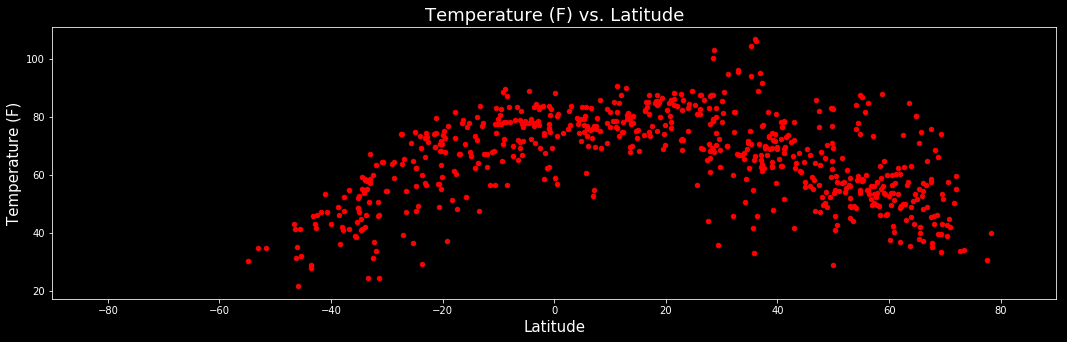

In [19]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [20]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Humidity (%)
0,"(-56.0, -32.0]",86.55
1,"(-32.0, -20.0]",82.9
2,"(-20.0, -6.0]",78.5667
3,"(-6.0, 5.0]",88.95
4,"(5.0, 17.0]",90.65
5,"(17.0, 28.0]",75.339
6,"(28.0, 37.0]",69.95
7,"(37.0, 46.0]",73.6333
8,"(46.0, 55.0]",68.7333
9,"(55.0, 63.0]",75.1


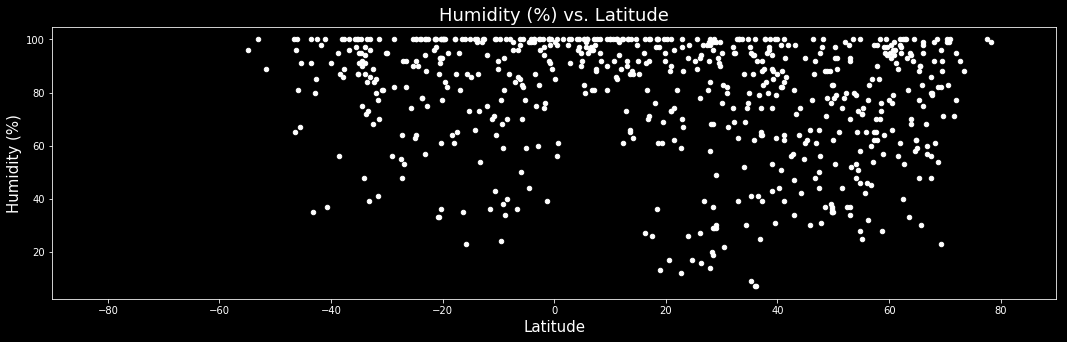

In [21]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [22]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Cloudiness (%)
0,"(-56.0, -32.0]",22.7333
1,"(-32.0, -20.0]",25.0667
2,"(-20.0, -6.0]",25.6667
3,"(-6.0, 5.0]",44
4,"(5.0, 17.0]",51.1333
5,"(17.0, 28.0]",43.661
6,"(28.0, 37.0]",25.4
7,"(37.0, 46.0]",32.2667
8,"(46.0, 55.0]",36
9,"(55.0, 63.0]",45.9333


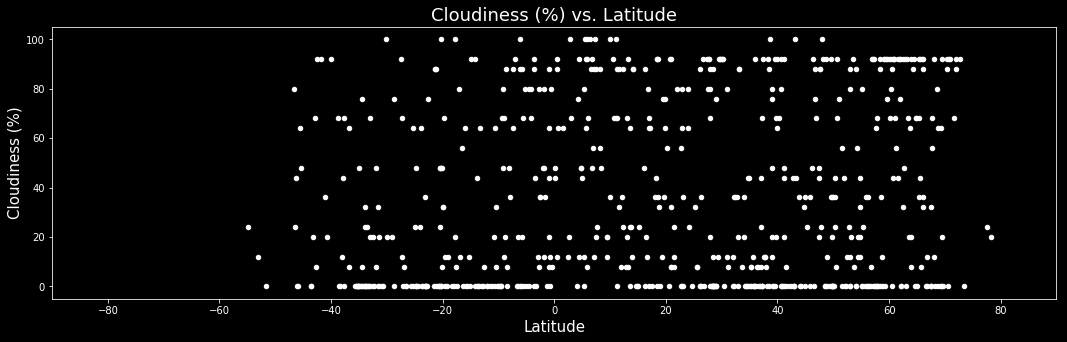

In [23]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [24]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Wind Speed (mph)
0,"(-56.0, -32.0]",8.80633
1,"(-32.0, -20.0]",8.60483
2,"(-20.0, -6.0]",9.3165
3,"(-6.0, 5.0]",6.57117
4,"(5.0, 17.0]",8.74983
5,"(17.0, 28.0]",7.76881
6,"(28.0, 37.0]",7.5135
7,"(37.0, 46.0]",7.06033
8,"(46.0, 55.0]",8.189
9,"(55.0, 63.0]",8.94367


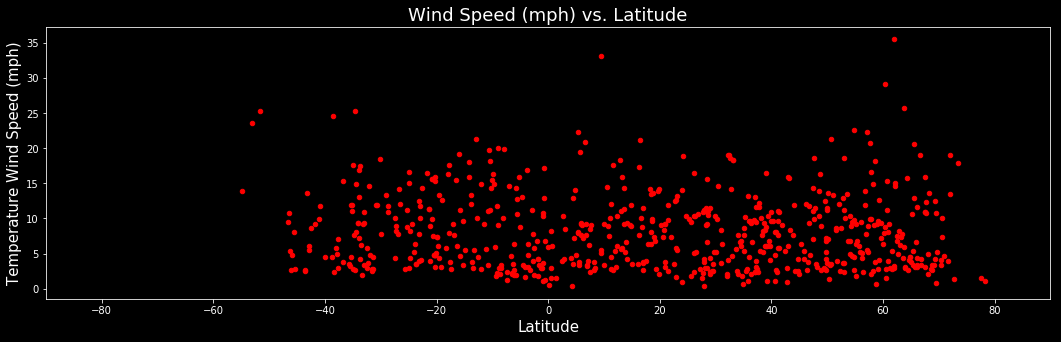

In [25]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel('Temperature Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [26]:
print("The average wind speed is {} mph for all randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))

The average wind speed is 8.081305007587256 mph for all randomly selected cities
